<a href="https://colab.research.google.com/github/KamalAsh0ur/NTI/blob/main/Diabetes_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import kagglehub
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output, State, dash_table
from datetime import datetime, timedelta
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [106]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Data Profiling (Null's , **Outliers**)

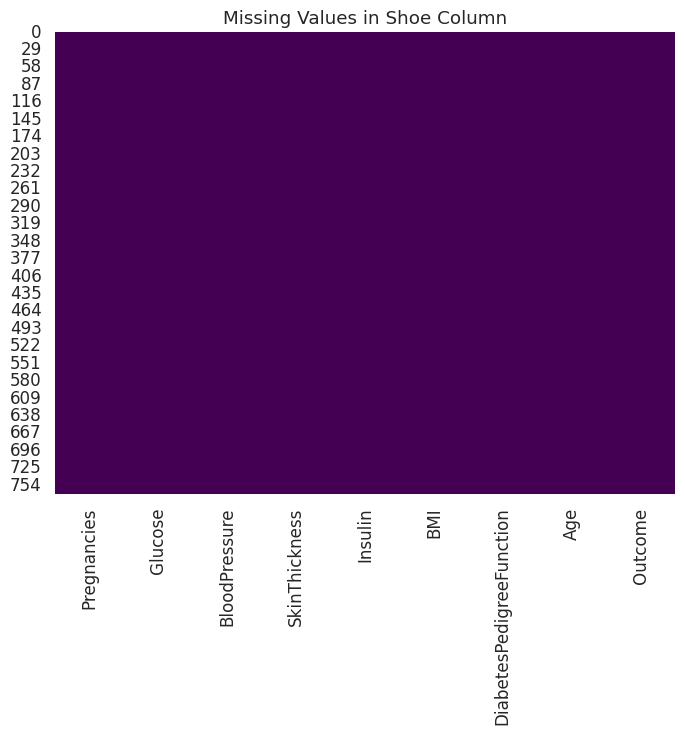

In [107]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Shoe Column')
plt.show()

# **Distribution**

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Descriptive Statistics:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       769.00   769.00         769.00         769.00    769.0  769.00   
mean          3.84   120.90          69.12          20.51     79.7   32.00   
std           3.37    31.95          19.35          15.96    115.2    7.88   
min           0.00     0.00           0.00           0.00      0.0    0.00   
25%           1.00    99.00          62.00           0.00      0.0   27.30   
50%           3.00   117.00          72.00          23.00     29.0   32.00   
75%           6.00   140.00          80.00          32.00    127.0   36.60   
m

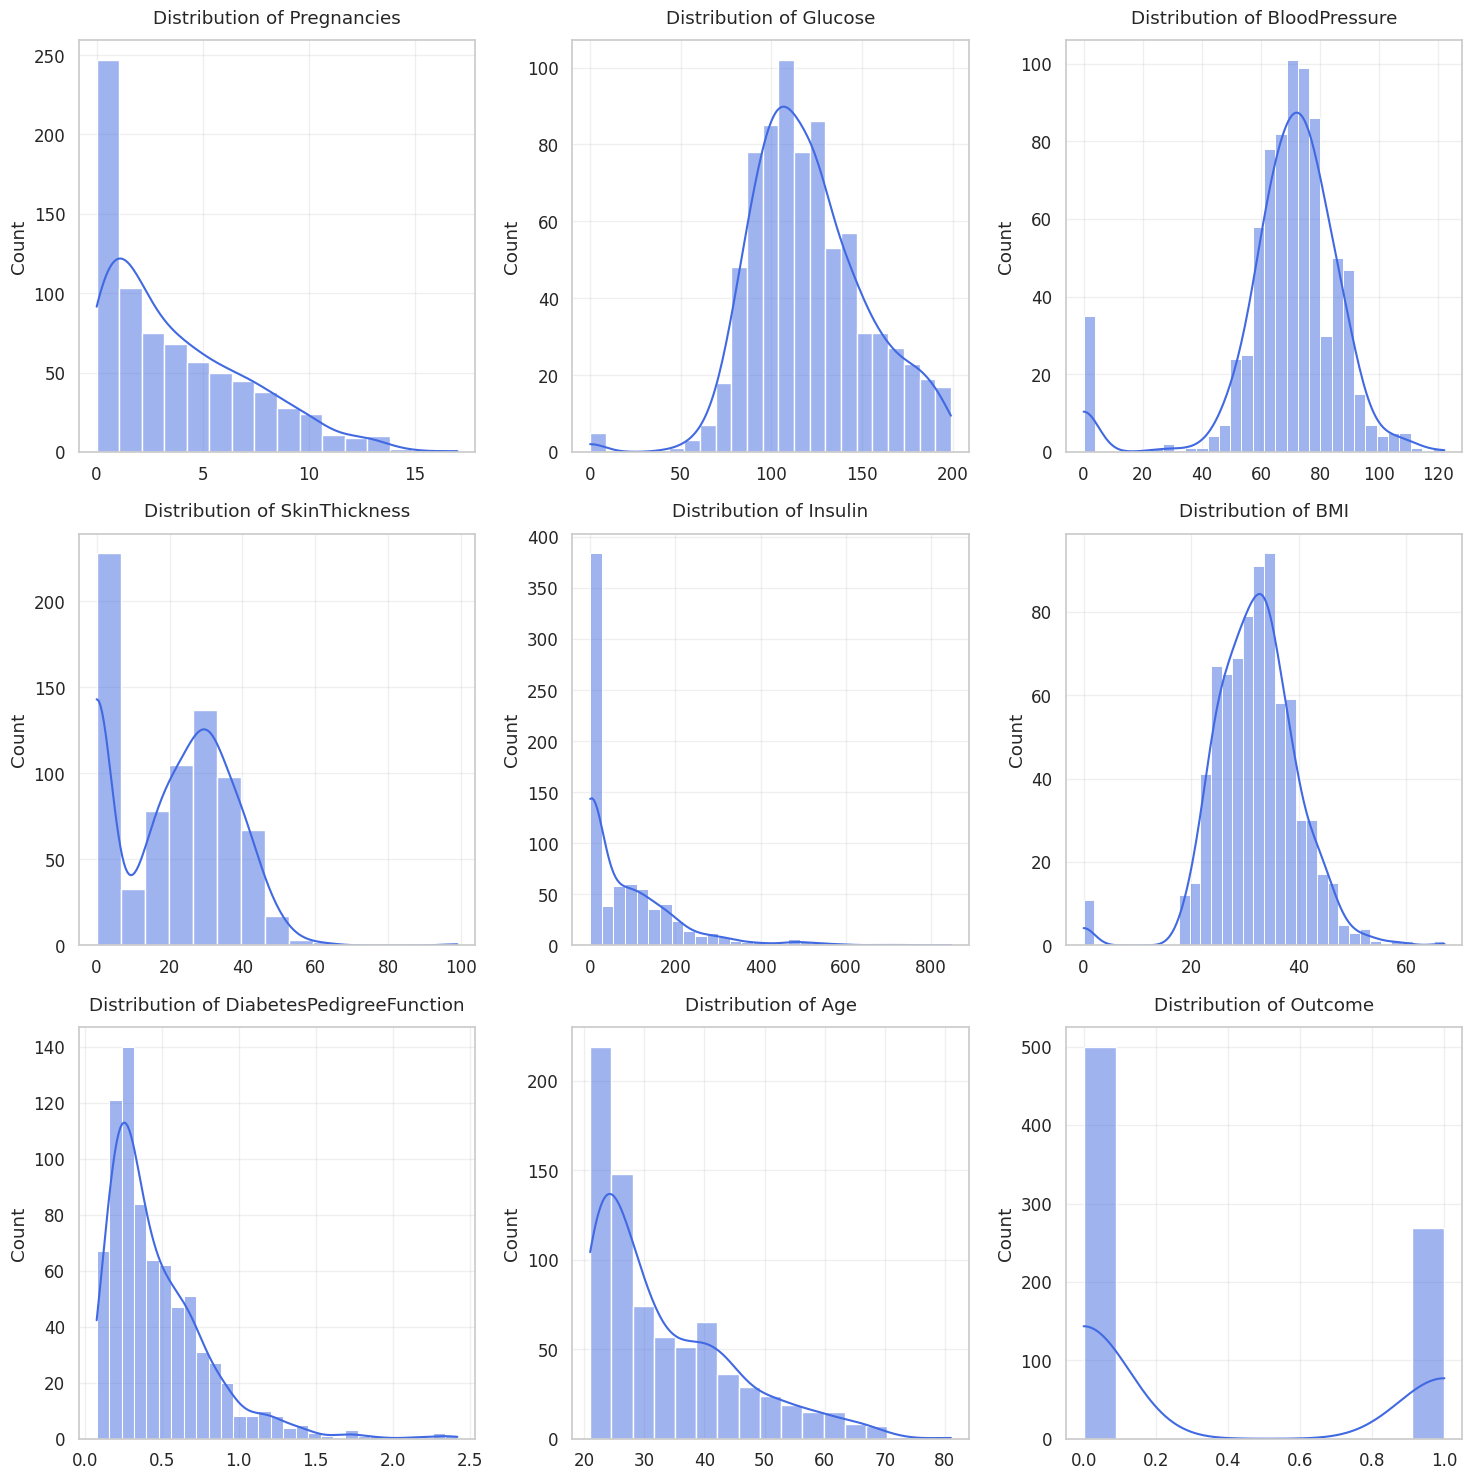

In [108]:
# Set style and context for better visual consistency
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
plt.rcParams['figure.dpi'] = 100

# Print data types and statistics
print("Data Types:")
print(df.dtypes)
print("\nDescriptive Statistics:")
print(df.describe().round(2))

# Function to plot numerical features
def plot_numerical(df):
    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) == 0:
        return

    # Calculate grid dimensions
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols

    # Create subplot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()  # Flatten for easy iteration

    for i, col in enumerate(num_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], bins='auto', color='royalblue')
        axes[i].set_title(f'Distribution of {col}', pad=12)
        axes[i].set_xlabel('')
        axes[i].grid(True, alpha=0.3)

    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Function to plot categorical features
def plot_categorical(df):
    cat_cols = df.select_dtypes(exclude=np.number).columns
    if len(cat_cols) == 0:
        return

    # Calculate grid dimensions
    n_cols = 2
    n_rows = (len(cat_cols) + n_cols - 1) // n_cols

    # Create subplot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {col}', pad=12)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)

    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Generate plots
plot_numerical(df)
plot_categorical(df)


# Outliers **Handling**

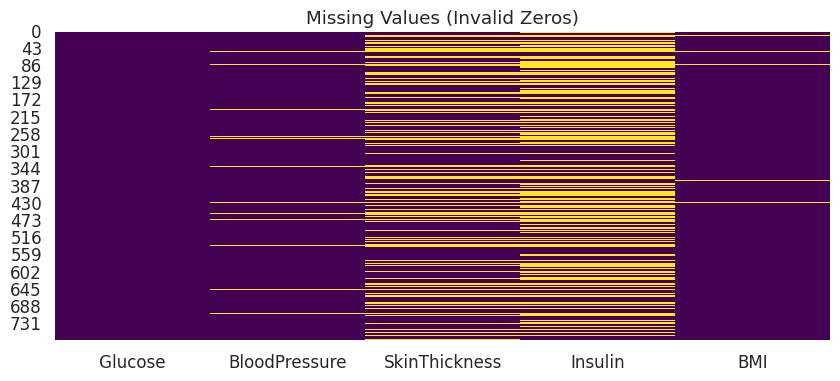

In [109]:
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Plot missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df[zero_cols].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values (Invalid Zeros)")
plt.show()

In [110]:
from sklearn.impute import SimpleImputer

# Impute missing values with median
imputer = SimpleImputer(strategy="median")
df[zero_cols] = imputer.fit_transform(df[zero_cols])

# Verify no missing values remain
print("Missing values after imputation:", df[zero_cols].isnull().sum().sum())

Missing values after imputation: 0


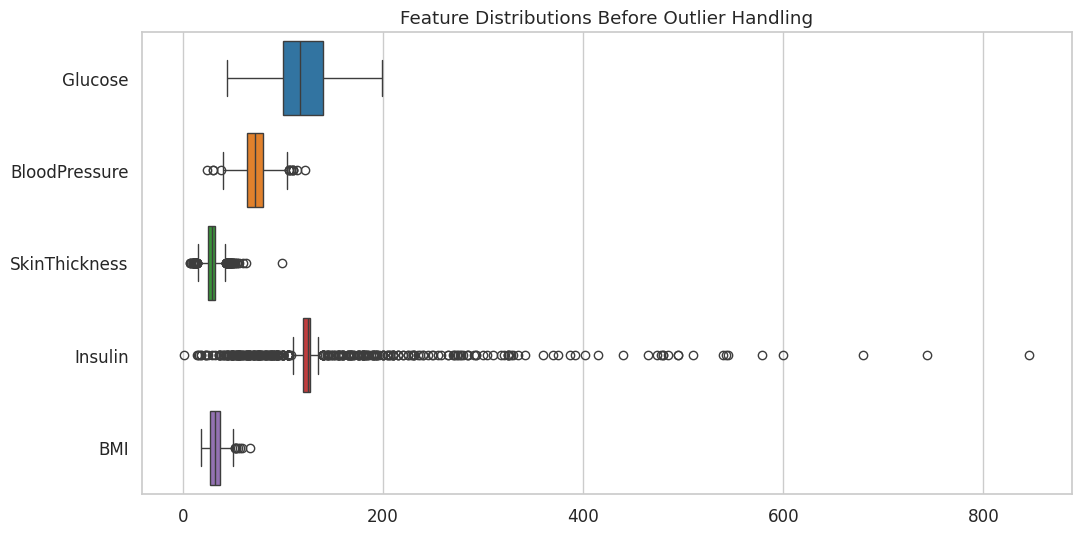

In [111]:
# Plot distributions before outlier handling
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[zero_cols], orient="h")
plt.title("Feature Distributions Before Outlier Handling")
plt.show()

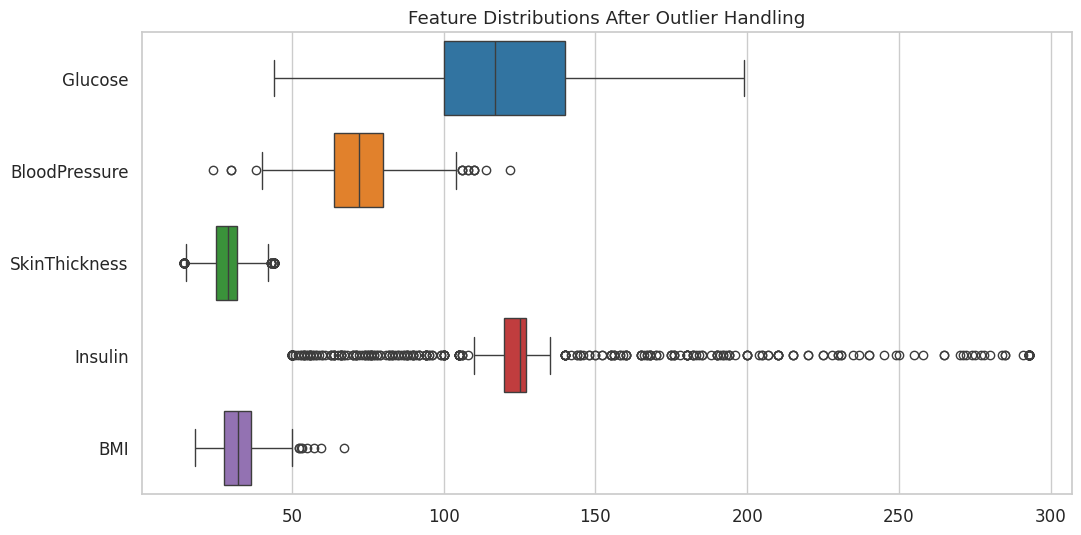

In [112]:
def cap_outliers(data, cols, lower=0.05, upper=0.95):
    for col in cols:
        lower_bound = data[col].quantile(lower)
        upper_bound = data[col].quantile(upper)
        data[col] = data[col].clip(lower_bound, upper_bound)
    return data

# Apply to skewed features
df = cap_outliers(df, ["Insulin", "SkinThickness", "DiabetesPedigreeFunction"])

# Plot after capping
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[zero_cols], orient="h")
plt.title("Feature Distributions After Outlier Handling")
plt.show()

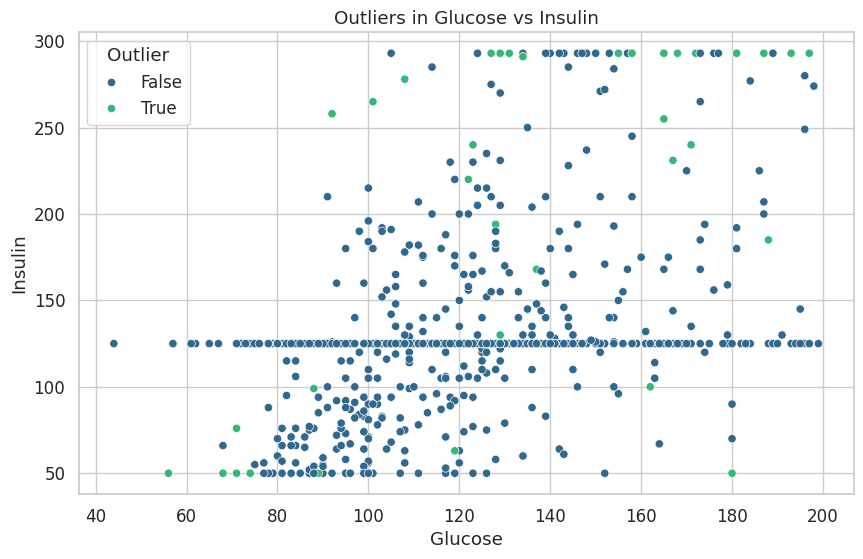

In [113]:
from sklearn.ensemble import IsolationForest

# Detect outliers
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(df[zero_cols])
df["Outlier"] = outliers == -1

# Visualize outliers in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Glucose", y="Insulin", hue="Outlier", palette="viridis")
plt.title("Outliers in Glucose vs Insulin")
plt.show()

In [114]:
print("\nFinal Summary Statistics:")
print(df[zero_cols].describe())


Final Summary Statistics:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  769.000000     769.000000     769.000000  769.000000  769.000000
mean   121.657997      72.392718      28.947464  133.859558   32.460208
std     30.418501      12.089908       7.610823   56.235841    6.872098
min     44.000000      24.000000      14.400000   50.000000   18.200000
25%    100.000000      64.000000      25.000000  120.000000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.000000      80.000000      32.000000  127.000000   36.600000
max    199.000000     122.000000      44.000000  293.000000   67.100000


Outlier Report:
                     column  outliers_count outliers_pct method  threshold
0               Pregnancies               4        0.52%    iqr        1.5
1                   Glucose               0        0.00%    iqr        1.5
2             BloodPressure              14        1.82%    iqr        1.5
3             SkinThickness              87       11.31%    iqr        1.5
4                   Insulin             340       44.21%    iqr        1.5
5                       BMI               8        1.04%    iqr        1.5
6  DiabetesPedigreeFunction               0        0.00%    iqr        1.5
7                       Age               9        1.17%    iqr        1.5
8                   Outcome               0        0.00%    iqr        1.5

Original Distributions with Outliers:


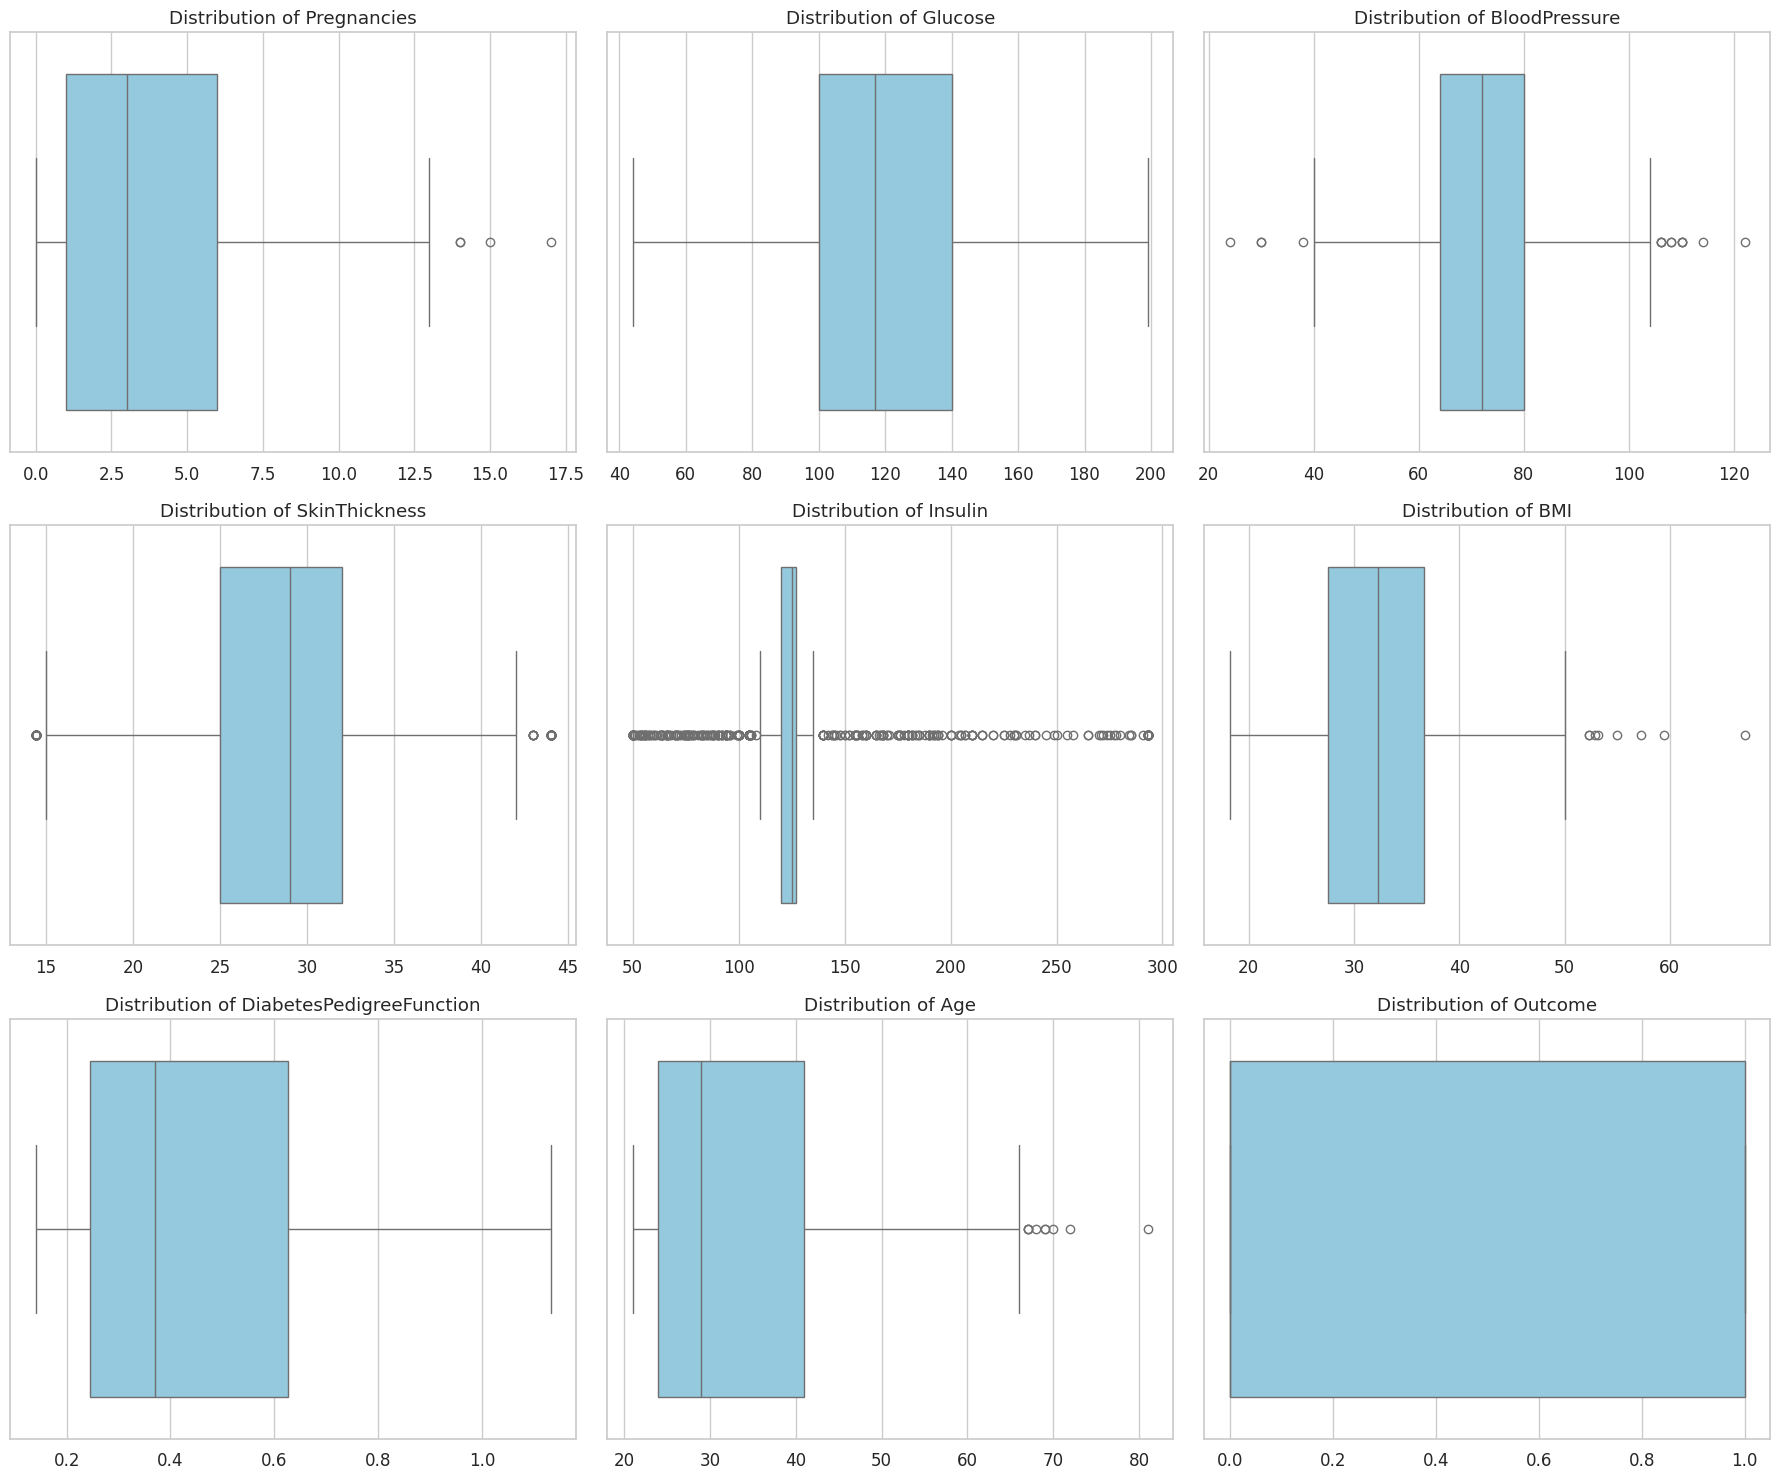


Distributions After Outlier Treatment:


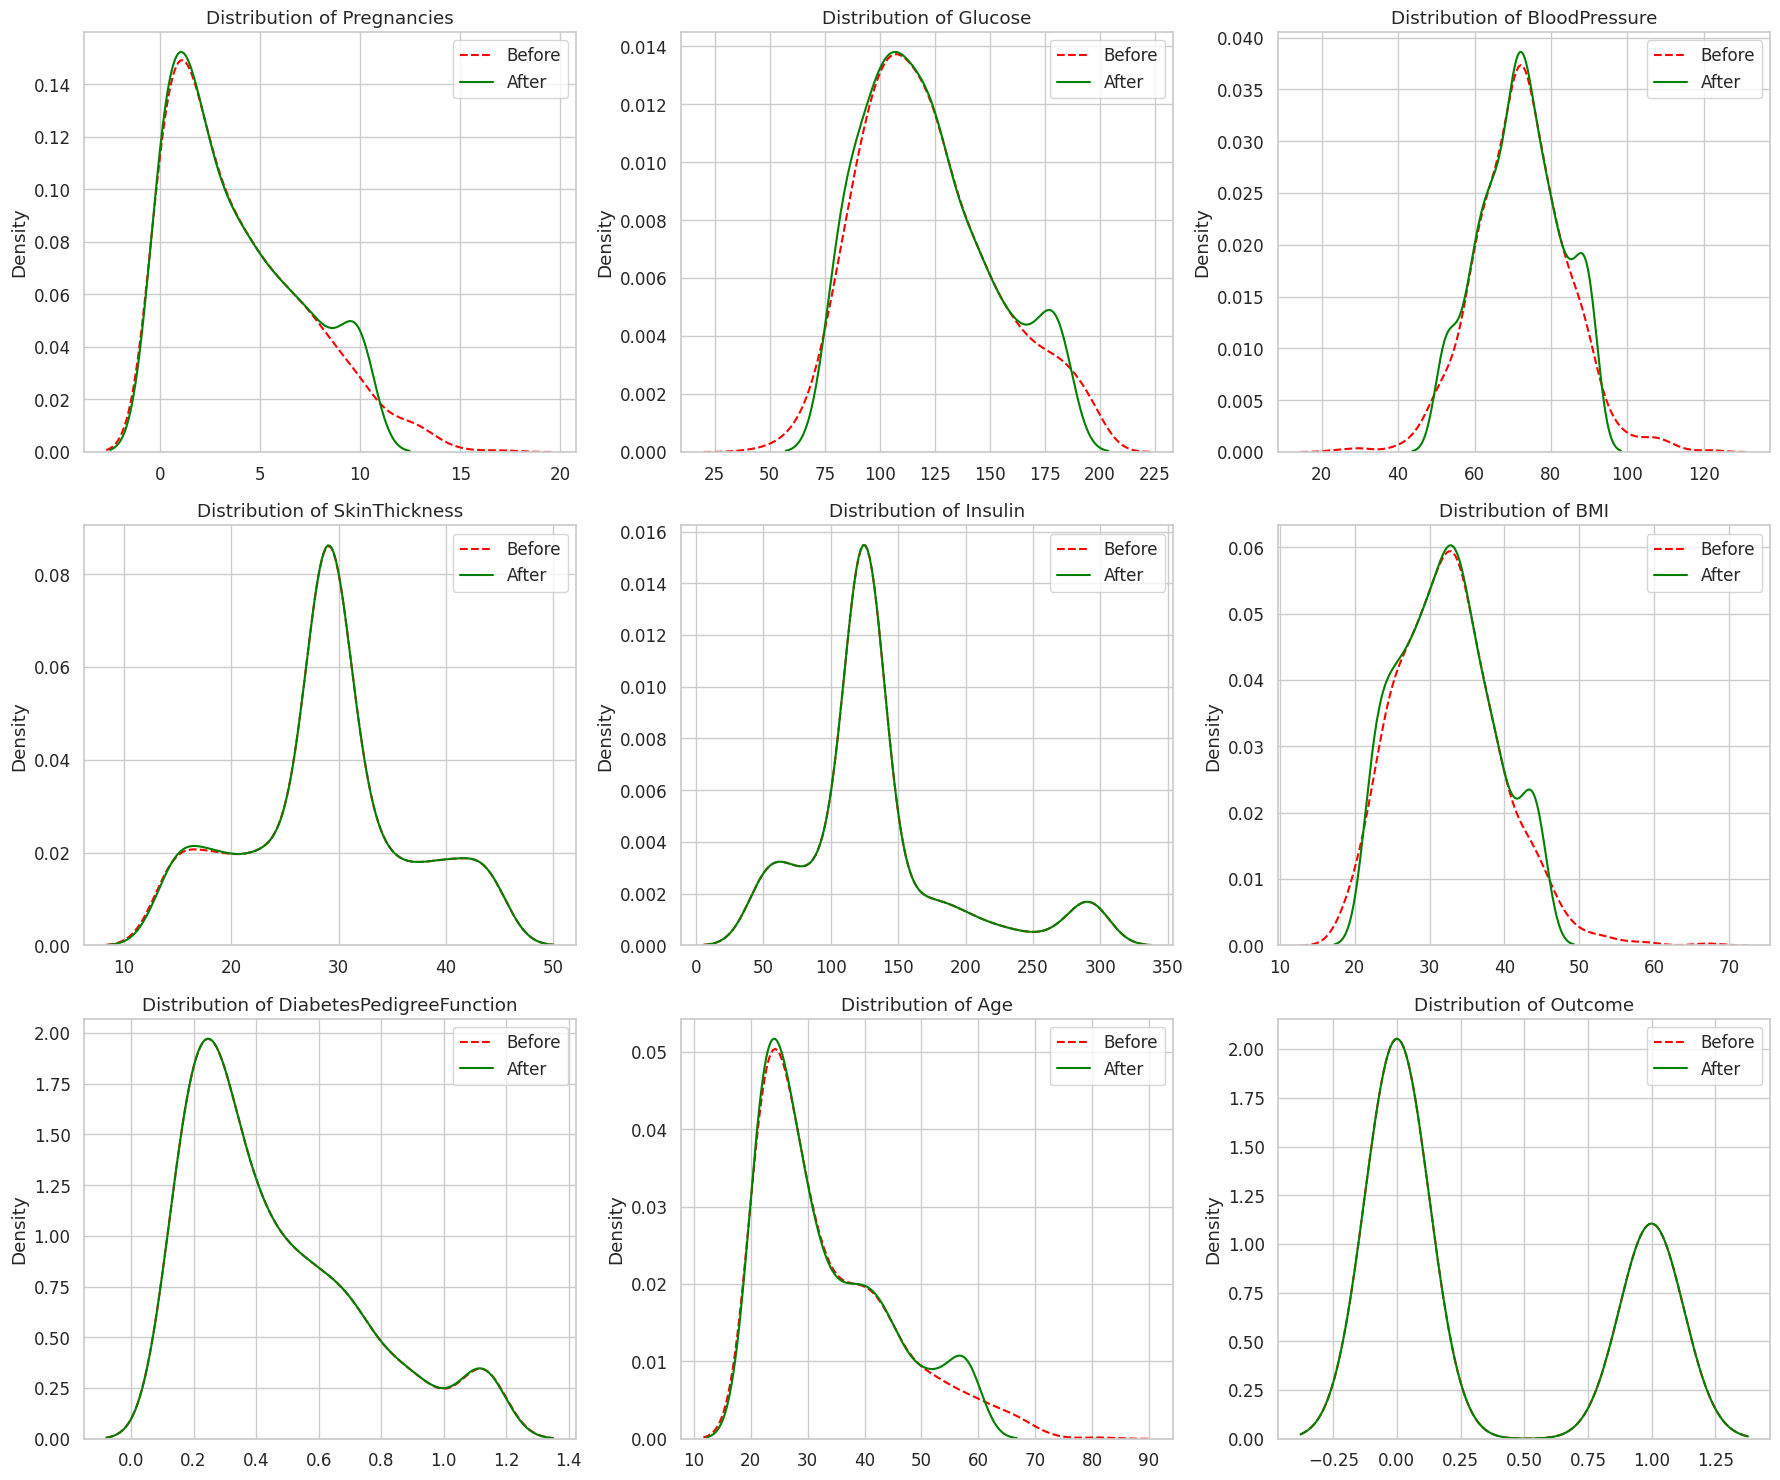


Summary Statistics Before Treatment:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       769.00   769.00         769.00         769.00   769.00  769.00   
mean          3.84   121.66          72.39          28.95   133.86   32.46   
std           3.37    30.42          12.09           7.61    56.24    6.87   
min           0.00    44.00          24.00          14.40    50.00   18.20   
25%           1.00   100.00          64.00          25.00   120.00   27.50   
50%           3.00   117.00          72.00          29.00   125.00   32.30   
75%           6.00   140.00          80.00          32.00   127.00   36.60   
max          17.00   199.00         122.00          44.00   293.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    769.00  769.00   769.00  
mean                       0.46   33.27     0.35  
std                        0.28   11.78     0.48  
min                        0.14   21.00     0.00  
25% 

In [115]:
def detect_outliers(df, method='iqr', threshold=1.5):
    """
    Detect outliers using specified method (IQR or Z-score)
    Returns DataFrame with outlier flags and summary statistics
    """
    numeric_cols = df.select_dtypes(include=np.number).columns
    outlier_report = []
    outlier_flags = pd.DataFrame(index=df.index)

    for col in numeric_cols:
        col_data = df[col].dropna()

        if method.lower() == 'iqr':
            Q1 = col_data.quantile(0.25)
            Q3 = col_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
        elif method.lower() == 'zscore':
            z_scores = (col_data - col_data.mean()) / col_data.std()
            lower_bound = -threshold
            upper_bound = threshold
        else:
            raise ValueError("Method must be 'iqr' or 'zscore'")

        # Calculate outliers
        if method == 'iqr':
            outliers = (col_data < lower_bound) | (col_data > upper_bound)
        else:
            outliers = (z_scores < lower_bound) | (z_scores > upper_bound)

        # Store results
        outlier_flags[col+'_outlier'] = outliers
        outlier_pct = outliers.mean() * 100

        outlier_report.append({
            'column': col,
            'outliers_count': outliers.sum(),
            'outliers_pct': f"{outlier_pct:.2f}%",
            'method': method,
            'threshold': threshold
        })

    return pd.DataFrame(outlier_report), outlier_flags

def handle_outliers(df, method='winsorize', **kwargs):
    """
    Handle outliers using specified method:
    - 'remove': Drop rows with outliers
    - 'winsorize': Cap values at thresholds
    - 'transform': Apply log/square root transformations
    - 'impute': Replace with median/mean
    """
    df_copy = df.copy()
    numeric_cols = df.select_dtypes(include=np.number).columns

    for col in numeric_cols:
        if method == 'remove':
            _, outliers = detect_outliers(df[[col]], **kwargs)
            df_copy = df_copy[~outliers[col+'_outlier']]

        elif method == 'winsorize':
            q_low = df_copy[col].quantile(kwargs.get('winsorize_low', 0.05))
            q_high = df_copy[col].quantile(kwargs.get('winsorize_high', 0.95))
            df_copy[col] = np.where(df_copy[col] < q_low, q_low,
                                  np.where(df_copy[col] > q_high, q_high,
                                           df_copy[col]))

        elif method == 'transform':
            if kwargs.get('transform_type') == 'log':
                df_copy[col] = np.log1p(df_copy[col])
            elif kwargs.get('transform_type') == 'sqrt':
                df_copy[col] = np.sqrt(df_copy[col])

        elif method == 'impute':
            if kwargs.get('impute_with') == 'median':
                replacement = df_copy[col].median()
            else:
                replacement = df_copy[col].mean()

            _, outliers = detect_outliers(df[[col]], **kwargs)
            df_copy.loc[outliers[col+'_outlier'], col] = replacement

    return df_copy

def visualize_outliers(df, before_df=None):
    """Visual comparison of distributions before/after outlier treatment"""
    numeric_cols = df.select_dtypes(include=np.number).columns
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    plt.figure(figsize=(18, 5*n_rows))

    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i+1)

        if before_df is not None:
            sns.kdeplot(before_df[col], label='Before', color='red', linestyle='--')
            sns.kdeplot(df[col], label='After', color='green')
            plt.legend()
        else:
            sns.boxplot(x=df[col], color='skyblue')

        plt.title(f'Distribution of {col}')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()

# Example workflow:
# 1. Detect outliers
outlier_report, outlier_flags = detect_outliers(df, method='iqr', threshold=1.5)
print("Outlier Report:")
print(outlier_report)

# 2. Visualize original distributions
print("\nOriginal Distributions with Outliers:")
visualize_outliers(df)

# 3. Handle outliers (choose method)
df_clean = handle_outliers(df, method='winsorize', winsorize_low=0.05, winsorize_high=0.95)

# 4. Compare distributions
print("\nDistributions After Outlier Treatment:")
visualize_outliers(df_clean, before_df=df)

# 5. Show summary statistics
print("\nSummary Statistics Before Treatment:")
print(df.describe().round(2))

print("\nSummary Statistics After Treatment:")
print(df_clean.describe().round(2))

In [116]:


# ===========================================
# 3. 3D Outlier Visualization (Improved Layout)
# ===========================================
fig = px.scatter_3d(df, x="Glucose", y="BMI", z="Age",
                   color="Outlier", size="Insulin",
                   hover_data=["BloodPressure", "SkinThickness"],
                   title="<b>Multidimensional Outlier Analysis</b>",
                   opacity=0.7,
                   color_discrete_map={True: '#FF0000', False: '#0000FF'})

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
    scene=dict(
        xaxis_title='Glucose ▼',
        yaxis_title='BMI ▼',
        zaxis_title='Age ▼',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.5))
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=600,
    width=1000
)

fig.show()

In [124]:
import dash_bootstrap_components as dbc


# Calculate KPIs
outcome_counts = df['Outcome'].value_counts()
percentage_diabetic = (outcome_counts[1]/outcome_counts.sum())*100
average_metrics = df.groupby('Outcome').mean().reset_index()

# Initialize the Dash app with Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])

# Define the layout
app.layout = dbc.Container([
    # Header
    dbc.Row([
        dbc.Col(html.H1("Diabetes Analysis Dashboard",
                       className="text-center mb-4",
                       style={'color': '#00FF00'}),
                width=12)
    ]),

    # KPI Cards
    dbc.Row([
        dbc.Col(dbc.Card([
            dbc.CardHeader("Total Patients"),
            dbc.CardBody([
                html.H2(f"{len(df)}", className="card-title")
            ])
        ], color="primary"), md=3),

        dbc.Col(dbc.Card([
            dbc.CardHeader("Diabetic Patients"),
            dbc.CardBody([
                html.H2(f"{outcome_counts[1]} ({percentage_diabetic:.1f}%)", className="card-title")
            ])
        ], color="danger"), md=3),

        dbc.Col(dbc.Card([
            dbc.CardHeader("Avg Glucose Level"),
            dbc.CardBody([
                html.H2(f"{df['Glucose'].mean():.1f}", className="card-title")
            ])
        ], color="info"), md=3),

        dbc.Col(dbc.Card([
            dbc.CardHeader("Avg BMI"),
            dbc.CardBody([
                html.H2(f"{df['BMI'].mean():.1f}", className="card-title")
            ])
        ], color="warning"), md=3)
    ], className="mb-4"),

    # Main Visualizations
    dbc.Row([
        dbc.Col([
            dcc.Graph(figure=px.pie(df, names='Outcome', title='Diabetes Distribution',
                                   color='Outcome',
                                   color_discrete_map={0:'#1f77b4', 1:'#ff7f0e'},
                                   hole=0.4))
        ], md=4),

        dbc.Col([
            dcc.Dropdown(id='feature-selector',
                        options=[{'label': col, 'value': col}
                                for col in df.columns if col != 'Outcome'],
                        value='Age',
                        clearable=False),
            dcc.Graph(id='distribution-plot')
        ], md=8)
    ], className="mb-4"),

    # Interactive Section
    dbc.Row([
        dbc.Col([
            html.H3("Interactive Analysis", className="mb-3"),
            dbc.Tabs([
                dbc.Tab([
                    html.Div([
                        dcc.Dropdown(id='x-axis',
                                    options=[{'label': col, 'value': col}
                                            for col in df.columns],
                                    value='Glucose'),
                        dcc.Dropdown(id='y-axis',
                                    options=[{'label': col, 'value': col}
                                            for col in df.columns],
                                    value='BMI'),
                        dcc.Graph(id='scatter-plot')
                    ])
                ], label="Scatter Plot"),

                dbc.Tab([
                    dcc.Graph(figure=px.box(df, x='Outcome', y='Age',
                                          color='Outcome',
                                          title='Age Distribution by Outcome'))
                ], label="Age Analysis"),
            ])
        ], md=6),

        dbc.Col([
            dcc.Graph(figure=px.imshow(df.corr(),
                                      title='Feature Correlation Matrix',
                                      color_continuous_scale='Viridis'))
        ], md=6)
    ]),

    # Distribution Grid
    dbc.Row([
        dbc.Col([
            html.H3("Feature Distributions by Outcome", className="mb-3"),
            dcc.Dropdown(id='dist-col-selector',
                        options=[{'label': col, 'value': col}
                                for col in df.columns if col != 'Outcome'],
                        value='Glucose',
                        clearable=False),
            dcc.Graph(id='violin-plot')
        ], md=12)
    ]),

    # Data Description
    dbc.Row([
        dbc.Col([
            html.Div([
                html.H4("Dataset Description"),
                html.P(f"Total Features: {len(df.columns)}"),
                html.P("Features include Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome"),
                html.P(f"Data Range: {df['Age'].min()} - {df['Age'].max()} years")
            ], className="mt-4 p-3 bg-secondary rounded")
        ], md=12)
    ])
], fluid=True)

# Callbacks
@app.callback(
    Output('distribution-plot', 'figure'),
    Input('feature-selector', 'value')
)
def update_distribution(feature):
    fig = px.histogram(df, x=feature, color='Outcome',
                      nbins=30, barmode='overlay',
                      title=f'{feature} Distribution',
                      color_discrete_map={0:'#1f77b4', 1:'#ff7f0e'})
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
    return fig

@app.callback(
    Output('violin-plot', 'figure'),
    Input('dist-col-selector', 'value')
)
def update_violin(column):
    fig = px.violin(df, x='Outcome', y=column, color='Outcome',
                   box=True, points="all",
                   title=f'{column} Distribution by Outcome',
                   color_discrete_map={0:'#1f77b4', 1:'#ff7f0e'})
    return fig

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value')]
)
def update_scatter(x, y):
    fig = px.scatter(df, x=x, y=y, color='Outcome',
                   size='Age', hover_data=['Pregnancies'],
                   title=f'{x} vs {y}',
                   color_discrete_map={0:'#1f77b4', 1:'#ff7f0e'})
    fig.update_traces(marker=dict(opacity=0.7))
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>